In [1]:
# import os
# os.environ['KERAS_BACKEND'] = 'theano'

In [2]:
import keras.backend as K

Using TensorFlow backend.


In [3]:
import numpy as np

with open('../../mnist/data/t10k-images-idx3-ubyte', 'rb') as f:
    x_data = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28 * 28) / 255

with open('../../mnist/data/t10k-labels-idx1-ubyte', 'rb') as f:
    y_data = np.frombuffer(f.read(), np.uint8, offset=8)

In [4]:
x_data = x_data.astype(K.floatx())

In [5]:
# 손글씨 이미지 인식용 데이터

import keras.utils

x_test = x_data[:1000].reshape(-1, 28, 28, 1)
y_test = keras.utils.to_categorical(y_data[:1000], num_classes=10)

x_train = x_data[1000:].reshape(-1, 28, 28, 1)
y_train = keras.utils.to_categorical(y_data[1000:], num_classes=10)

In [6]:
# CNN

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()

model.add(Conv2D(4, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(8, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
# 훈련

model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
9000/9000 [==============================] - 7s - loss: 1.2061 - acc: 0.5894     
Epoch 2/10
9000/9000 [==============================] - 6s - loss: 0.5231 - acc: 0.8334     
Epoch 3/10
9000/9000 [==============================] - 6s - loss: 0.3944 - acc: 0.8763     
Epoch 4/10
9000/9000 [==============================] - 6s - loss: 0.3212 - acc: 0.8994     
Epoch 5/10
9000/9000 [==============================] - 6s - loss: 0.2770 - acc: 0.9073     
Epoch 6/10
9000/9000 [==============================] - 6s - loss: 0.2559 - acc: 0.9167     
Epoch 7/10
9000/9000 [==============================] - 6s - loss: 0.2328 - acc: 0.9239     
Epoch 8/10
9000/9000 [==============================] - 6s - loss: 0.2238 - acc: 0.9251     
Epoch 9/10
9000/9000 [==============================] - 6s - loss: 0.2140 - acc: 0.9309     
Epoch 10/10
9000/9000 [==============================] - 6s - loss: 0.1984 - acc: 0.9349     


In [8]:
# 모델 검증

loss, accuracy = model.evaluate(x_test, y_test, batch_size=128)
accuracy

 896/1000 [=========================>....] - ETA: 0s

0.95799999904632571

In [9]:
# 예측 = 손글씨 이미지 인식

classes = model.predict(x_test, batch_size=128)
np.argmax(classes, axis=1)[:20]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4])

ready...
--------------------------------------------------------------------------------


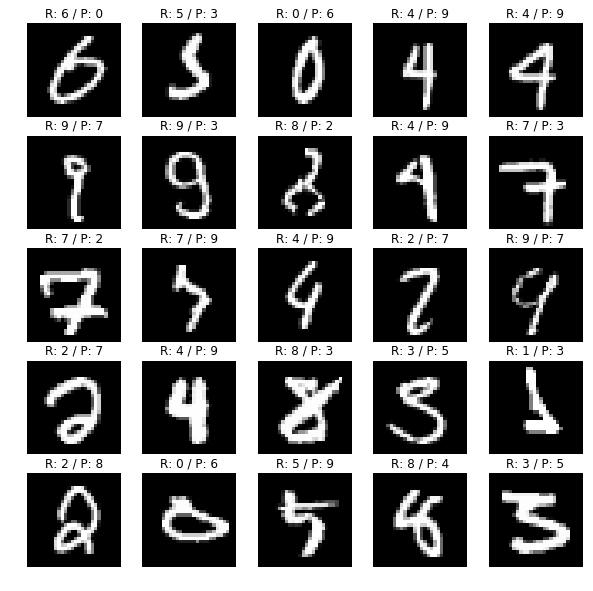

In [10]:
# 오답 시각화

import matplotlib.pyplot as plt

predict = np.argmax(classes, axis=1)
correct = predict == y_data[:1000]

indices = np.arange(1000)[~correct]
np.random.shuffle(indices)

print('ready...')
print('-' * 80)

fig, axes = plt.subplots(5, 5, figsize=(10, 10))
for i, ax in zip(indices[:25], axes.flat):
    ax.set_axis_off()
    ax.imshow(x_data[i].reshape(28, 28), cmap='gray')
    ax.set_title('R: {} / P: {}'.format(y_data[i], predict[i]))

plt.show()

In [11]:
# 손글씨 이미지 생성용 데이터

x_test = x_data[:1000, :14 * 28]
y_test = x_data[:1000, 14 * 28:]

x_train = x_data[1000:, :14 * 28]
y_train = x_data[1000:, 14 * 28:]

In [12]:
# RNN

from keras.models import Sequential
from keras.layers import Reshape, GRU, Dropout, Dense

model = Sequential()

model.add(Reshape((14, 28), input_shape=(14 * 28,)))

model.add(GRU(100))
model.add(Dropout(0.25))

model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(14 * 28, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

In [13]:
# 훈련

model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
9000/9000 [==============================] - 41s - loss: 290.1260    
Epoch 2/10
9000/9000 [==============================] - 22s - loss: 279.0521    
Epoch 3/10
9000/9000 [==============================] - 19s - loss: 273.1725    
Epoch 4/10
9000/9000 [==============================] - 19s - loss: 270.8796    
Epoch 5/10
9000/9000 [==============================] - 22s - loss: 269.5051    
Epoch 6/10
9000/9000 [==============================] - 23s - loss: 268.6264    
Epoch 7/10
9000/9000 [==============================] - 23s - loss: 267.9257    
Epoch 8/10
9000/9000 [==============================] - 24s - loss: 267.3744    
Epoch 9/10
9000/9000 [==============================] - 24s - loss: 267.0309    
Epoch 10/10
9000/9000 [==============================] - 24s - loss: 266.5794    


In [14]:
# 모델 검증

model.evaluate(x_test, y_test, batch_size=128)

1000/1000 [==============================] - 0s     


241.75769140624999

ready...
--------------------------------------------------------------------------------


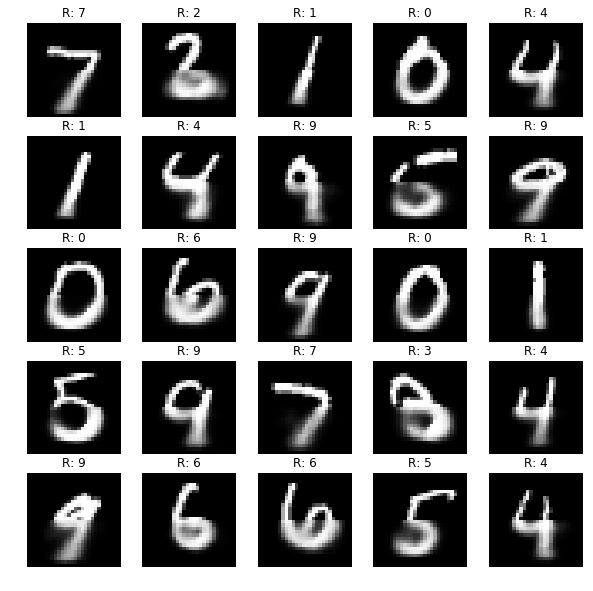

In [15]:
# 예측 + 시각화

import matplotlib.pyplot as plt

predict = model.predict(x_test[:25, :], batch_size=128)
images = np.concatenate([x_test[:25, :], predict], axis=1)

print('ready...')
print('-' * 80)

fig, axes = plt.subplots(5, 5, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.set_axis_off()
    ax.imshow(images[i].reshape(28, 28), cmap='gray')
    ax.set_title('R: {}'.format(y_data[i]))

plt.show()

In [16]:
import re

with open('data.txt', encoding='utf-8') as f:
    read_data = f.read()

text = read_data.replace('\n', ' ')
text = re.sub('\s+', '_', text)

chars = list(set(text))

num_chars = len(chars)
num_inputs = 10

In [17]:
import keras.utils

x_data = []
y_data = []

for i in range(len(text) - num_inputs):
    x_data.append([chars.index(x) for x in list(text[i:i + num_inputs])])
    y_data.append(chars.index(text[i + num_inputs]))

x_data = np.array(x_data).astype(K.floatx())
y_data = keras.utils.to_categorical(y_data, num_classes=num_chars)

In [18]:
# RNN

from keras.models import Sequential
from keras.layers import Embedding, GRU, Dropout, Dense

model = Sequential()

model.add(Embedding(num_chars, 100, input_length=num_inputs))

model.add(GRU(100))
model.add(Dropout(0.25))

model.add(Dense(200, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_chars, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [19]:
# 훈련 & 예측 = 텍스트 생성

def generate():
    inputs = [chars.index(x) for x in list('그리워하면_언젠간_')]
    for i in range(50):
        predict = model.predict(np.array([inputs[-num_inputs:]]), batch_size=128)
        output = np.argmax(predict, axis=1)
        inputs = np.hstack([inputs, output])
    print(''.join(chars[x] for x in inputs.tolist()))

for i in range(10):
    print(i + 1)
    model.fit(x_data, y_data, epochs=5, batch_size=32, verbose=False)
    loss, accuracy = model.evaluate(x_data, y_data, batch_size=128)
    print('accuracy: {}'.format(accuracy))
    generate()

1
382/382 [==============================] - 0s     
accuracy: 0.2722513134254835
그리워하면_언젠간___________________________________________________
2
382/382 [==============================] - 0s     
accuracy: 0.2827225174579321
그리워하면_언젠간_나_나_나나_나나_나나_나_나나_나나_나나_나_나나_나나_나나_나_나나_나나_나나_나_나나
3
382/382 [==============================] - 0s     
accuracy: 0.32984293583800034
그리워하면_언젠간_어나나나나나나나나나나나나나나나나나나나나나나나나나나나나나나나나나나나나나나나나나나나나나나나나나
4
382/382 [==============================] - 0s     
accuracy: 0.4895287958115183
그리워하면_언젠간_너는_너에_너에_너에_너에_너에_너에_너에_너에_너에_너에_너에_너에_너에_너에_너에_너에
5
382/382 [==============================] - 0s     
accuracy: 0.6910994804966513
그리워하면_언젠간_언젠간_언젠간_그리워하면_언젠간_언젠간_언젠간_그리워하면_언젠간_언젠간_언젠간_그리워하면_
6
382/382 [==============================] - 0s     
accuracy: 0.8115183161815424
그리워하면_언젠간_언젠간_언젠간_그리워하면_언젠간_언젠간_언젠간_그리워하면_언젠간_언젠간_언젠간_그리워하면_
7
382/382 [==============================] - 0s     
accuracy: 0.8795811421584084
그리워하면_언젠간_만나게_되는_어느_영화와_같은_일들이_이루어져_가기를_힘겨워한_날에_너를_지킬_수_없었던